In [2]:
import sys, os
sys.path.insert(0, '../../')
sys.path.insert(0, '../../python_src/')

import numpy as np
import scipy as sp
import pandas as pd
import numpy.random as rand
import scipy.optimize as spo
import scipy.interpolate as spi
import cPickle as pickle
import portalocker
import matplotlib.pyplot as plt; plt.rcdefaults()
import seaborn as sns
import shutil, shelve
import tarfile
import time
import itertools as it
import matplotlib.lines as mlines
import matplotlib as mpl

import mech_network_solver as mns
import network
import tuning_algs as talgs
import network_plot as nplot
import curve_fitting as curve

Loading Mechanical Network Deformation Solver Module


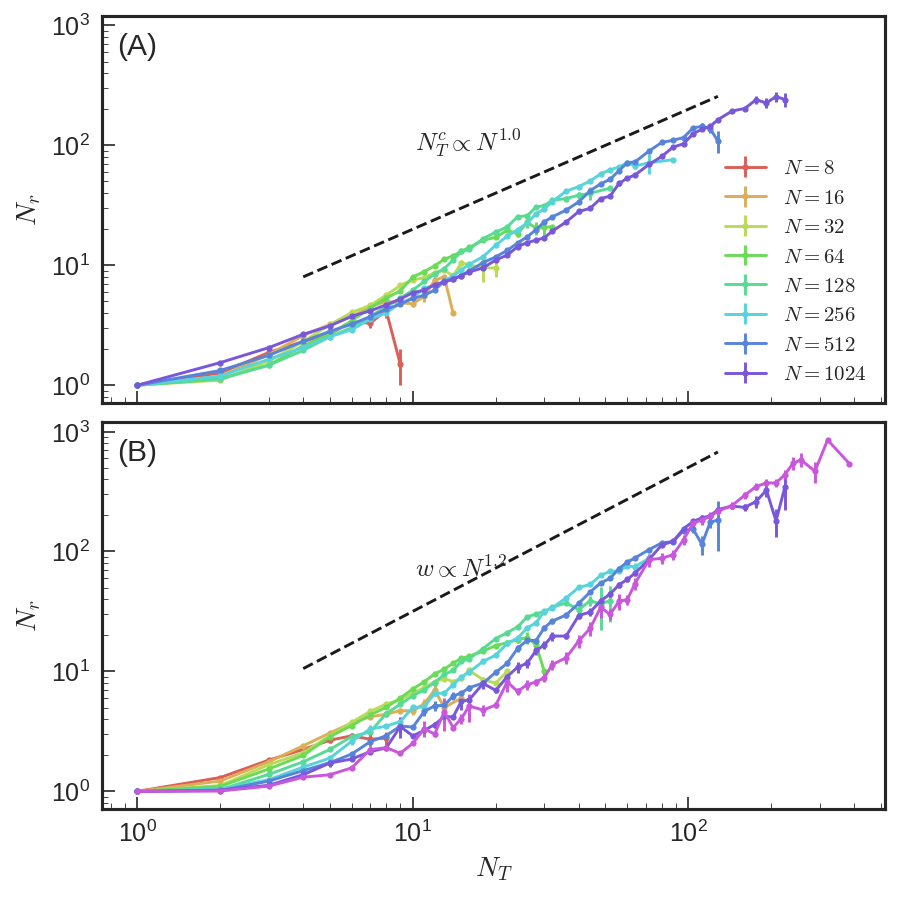

In [15]:
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['mathtext.fontset'] = 'cm'
sns.set(color_codes=True)
sns.set_context('paper', font_scale=1.5)
sns.set_palette("Set1", 8)
# sns.set_palette("muted", 8)
sns.set_style('ticks', {'xtick.direction': 'in','ytick.direction': 'in', 'axes.linewidth': 1.5})


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6), sharex=True, sharey=True)

   
fn = "tune_disc_2D_nodepair_default"

with open("{}.pkl".format(fn), 'r') as pkl_file:
    data = pickle.load(pkl_file)
#     df = data['df']
    df = data['df']

palette = it.cycle(sns.color_palette("hls", 10))
    
for NN, group in df.groupby(['NN']):

    color = next(palette)

    NT = np.array(group['NTS'])
    NR = np.array(group['NR'])
    
    count = np.array(group['count'])
    fsat = np.array(group['fsat'])
    NR_std = np.array(group['NR_std'])
        
    non_zero =  np.where(fsat > 0)[0]
    
    NR_err = NR_std[non_zero] / np.sqrt(count[non_zero] * fsat[non_zero])
    
#     np.array(group['NR_std']) / np.sqrt(count * fsat)

    ax1.errorbar(NT[non_zero], NR[non_zero], yerr=NR_err, fmt="o-", 
                 color=color, markersize=3, label=r"$N={:}$".format(int(NN)))


fn = "tune_disc_2D_edge_slice"

with open("{}.pkl".format(fn), 'r') as pkl_file:
    data = pickle.load(pkl_file)
#     df = data['df']
    df = data['df'].query("NN==8 or NN==16 or NN==32 or NN==64 or NN==128 or NN==256 or NN==512 or NN==1024 or NN==2048")

palette = it.cycle(sns.color_palette("hls", 10))
    
for NN, group in df.groupby(['NN']):

    color = next(palette)

    NT = np.array(group['NTS'])
    NR = np.array(group['NR'])
    
    count = np.array(group['count'])
    fsat = np.array(group['fsat'])
    NR_std = np.array(group['NR_std'])
        
    non_zero =  np.where(fsat > 0)[0]
    
    NR_err = NR_std[non_zero] / np.sqrt(count[non_zero] * fsat[non_zero])
    
#     np.array(group['NR_std']) / np.sqrt(count * fsat)

    ax2.errorbar(NT[non_zero], NR[non_zero], yerr=NR_err, fmt="o-", 
                 color=color, markersize=3, label=r"$N={:}$".format(int(NN)))


ax1.set_xscale('log')
ax1.set_yscale('log')
    
# ax1.set_ylim(0, 1)
ax1.set_ylabel(r'$N_r$')
# # ax1.set_xlabel(r'$N_T$')
# ax1.set_yticks([0.0, 0.5, 1.0])


ax2.set_yscale('log')
    
# ax2.set_ylim(0, 1)
ax2.set_ylabel(r'$N_r$')
ax2.set_xlabel(r'$N_T$')
# ax2.set_yticks([0.0, 0.5, 1.0])
# ax2.set_xscale('log')

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc='lower right', ncol=1, prop={'size':10})
    
    
ax1.text(0.02, 0.9, '(A)', transform=ax1.transAxes)
ax2.text(0.02, 0.9, '(B)', transform=ax2.transAxes)

# ax1.set_title("Flow Network")
# ax2.set_title("2D Spring Network")



def pow_law(x, A, B):
    return A*x**B

x = 10**np.linspace(np.log10(4), np.log10(128), 1000)

ax1.plot(x, pow_law(x, 2, 1.0), 'k--', label=r"$N_T^c \propto N^{0.7}$")
ax1.text(0.4, 0.65, r'$N_T^c \propto N^{1.0}$', transform=ax1.transAxes, fontsize=12)


ax2.plot(x, pow_law(x, 2, 1.2), 'k--', label=r"$w \propto N^{0.7}$")
ax2.text(0.4, 0.6, r'$w \propto N^{1.2}$', transform=ax2.transAxes, fontsize=12)
  
fig.tight_layout(pad=0.5)
    
# plt.savefig("figure4.pdf")
    
plt.show()

In [14]:
from scipy import stats
a = np.arange(20).reshape(5,4)
print a
print stats.sem(a)

print np.std(a,axis=0) / np.sqrt(4)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]
[ 2.82842712  2.82842712  2.82842712  2.82842712]
[ 2.82842712  2.82842712  2.82842712  2.82842712]
